<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [ ]:
!pip install osmnx geopy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

sns.set_style(style="dark")

### 🕸 Street network

In [ ]:
PLACE_NAME = "les Corts, Barcelona, Spain"
graph = osmnx.graph_from_place(PLACE_NAME)

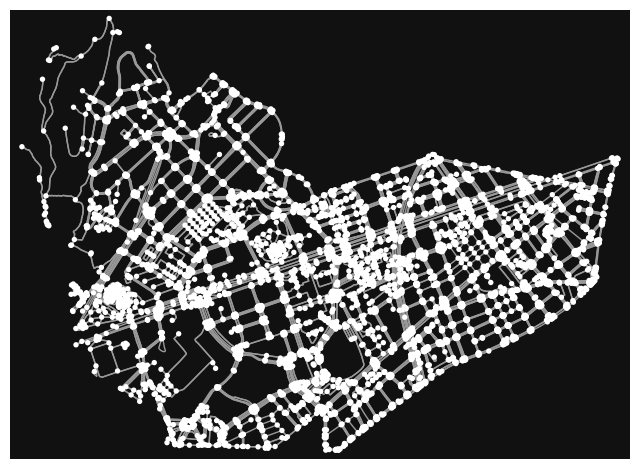

In [ ]:
# showing our street network

figure, ax = osmnx.plot_graph(graph)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [ ]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

buildings.head()

<ipython-input-5-25295188f309>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_sp

name  ref  \
element_type osmid                                               
node         2629932730                      NH Les Corts  NaN   
             5372082832                  Churrería Montse  NaN   
             8265818805                          Rocòdrom  NaN   
way          35814815    Facultat de Ciències de la Terra  NaN   
             36335613               Geociencies Barcelona  NaN   

                                                                  geometry  \
element_type osmid                                                           
node         2629932730                           POINT (2.13657 41.38750)   
             5372082832                           POINT (2.13385 41.38460)   
             8265818805                           POINT (2.12815 41.38467)   
way          35814815    POLYGON ((2.11888 41.38431, 2.11969 41.38451, ...   
             36335613    POLYGON ((2.11888 41.38443, 2.11918 41.38451, ...   

                        addr:housenumber                         addr:street  \
element_type osmid                                                             
node         2629932730              292             Travessera de les Corts   
             5372082832              NaN                                 NaN   
             8265818805               33  Carrer de Dolors Masferrer i Bosch   
way          35814815                NaN          Carrer de Martí i Franquès   
             36335613                NaN      Carrer de Lluís Solé i Sabarís   

                         addr:city addr:country addr:postcode     branch  \
element_type osmid                                                         
node         2629932730  Barcelona           ES         08029  Les Corts   
             5372082832        NaN          NaN           NaN        NaN   
             8265818805  BARCELONA          NaN         08028        NaN   
way          35814815    Barcelona          NaN           NaN        NaN   
             36335613    Barcelona          NaN         08028        NaN   

                           building  ... short_name  fax alt_name:ca  bar  \
element_type osmid                   ...                                    
node         2629932730         yes  ...        NaN  NaN         NaN  NaN   
             5372082832       kiosk  ...        NaN  NaN         NaN  NaN   
             8265818805      public  ...        NaN  NaN         NaN  NaN   
way          35814815           yes  ...        NaN  NaN         NaN  NaN   
             36335613    university  ...        NaN  NaN         NaN  NaN   

                        payment:credit_cards payment:debit_cards reservation  \
element_type osmid                                                             
node         2629932730                  NaN                 NaN         NaN   
             5372082832                  NaN                 NaN         NaN   
             8265818805                  NaN                 NaN         NaN   
way          35814815                    NaN                 NaN         NaN   
             36335613                    NaN                 NaN         NaN   

                        not:name brand:wikipedia payment:cash  
element_type osmid                                             
node         2629932730      NaN             NaN          NaN  
             5372082832      NaN             NaN          NaN  
             8265818805      NaN             NaN          NaN  
way          35814815        NaN             NaN          NaN  
             36335613        NaN             NaN          NaN  

[5 rows x 142 columns]

In [ ]:
buildings.geom_type.unique()

array(['Point', 'Polygon'], dtype=object)

In [ ]:
buildings = buildings[buildings.geom_type != 'Point']

<Axes: >

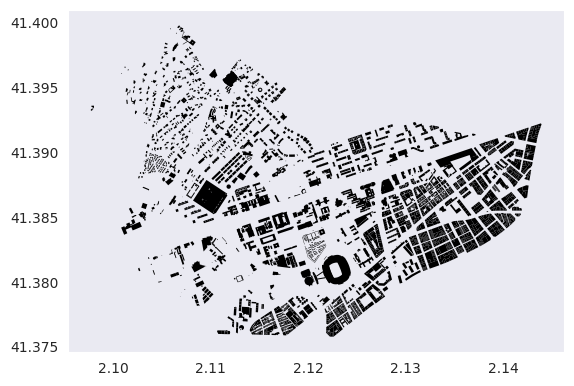

In [ ]:
buildings.plot(color="black", edgecolor="none")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [ ]:
restaurants = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": ["restaurant", 'cafe', 'fast_food']
    }
)
restaurants.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-51-e7fe871af647>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  restaurants = osmnx.geometries_from_place(


amenity   cuisine                    name  \
element_type osmid                                                     
node         364829711  restaurant  regional          Moncho's House   
             365288417  restaurant       NaN  El Jardí de l'Abadessa   
             891514326  restaurant       NaN       Restaurant Vertex   
             891741820  restaurant       NaN       Casa de Cantabria   
             891741832   fast_food       NaN     Frankfurt Pedralbes   

                                        geometry  \
element_type osmid                                 
node         364829711  POINT (2.13184 41.39000)   
             365288417  POINT (2.10990 41.39423)   
             891514326  POINT (2.11366 41.39046)   
             891741820  POINT (2.11316 41.39087)   
             891741832  POINT (2.11262 41.38705)   

                                              website      opening_hours  \
element_type osmid                                                         
node         364829711                            NaN                NaN   
             365288417  https://www.jardiabadessa.com                NaN   
             891514326                            NaN  Mo-Fr 08:00-16:00   
             891741820                            NaN                NaN   
             891741832                            NaN                NaN   

                           club               operator          phone  \
element_type osmid                                                      
node         364829711      NaN                    NaN            NaN   
             365288417      NaN                    NaN            NaN   
             891514326      NaN                    NaN            NaN   
             891741820  culture  Gobierno de Cantabria  +34 932039556   
             891741832      NaN                    NaN            NaN   

                                    name:ca  ... fast_food diet:lactose_free  \
element_type osmid                           ...                               
node         364829711                  NaN  ...       NaN               NaN   
             365288417                  NaN  ...       NaN               NaN   
             891514326                  NaN  ...       NaN               NaN   
             891741820                  NaN  ...       NaN               NaN   
             891741832  Frankfurt Pedralbes  ...       NaN               NaN   

                       highchair level microbrewery payment:credit_cards  \
element_type osmid                                                         
node         364829711       NaN   NaN          NaN                  NaN   
             365288417       NaN   NaN          NaN                  NaN   
             891514326       NaN   NaN          NaN                  NaN   
             891741820       NaN   NaN          NaN                  NaN   
             891741832       NaN   NaN          NaN                  NaN   

                       payment:debit_cards diet:vegan nodes height  
element_type osmid                                                  
node         364829711                 NaN        NaN   NaN    NaN  
             365288417                 NaN        NaN   NaN    NaN  
             891514326                 NaN        NaN   NaN    NaN  
             891741820                 NaN        NaN   NaN    NaN  
             891741832                 NaN        NaN   NaN    NaN  

[5 rows x 76 columns]

In [ ]:
bar = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": ["bar",'pub']
    }
)
bar.head()

<ipython-input-52-0acd92597439>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  bar = osmnx.geometries_from_place(


amenity                    name  \
element_type osmid                                        
node         1376141875     bar  Central Park Barcelona   
             1379064026     bar             Bar Donosti   
             1379064033     bar           Elephant Club   
             1445665620     bar                     NaN   
             1445665630     bar                     NaN   

                                         geometry  source source:date brewery  \
element_type osmid                                                              
node         1376141875  POINT (2.12228 41.38976)     NaN         NaN     NaN   
             1379064026  POINT (2.12016 41.38966)     NaN         NaN     NaN   
             1379064033  POINT (2.11865 41.38933)     NaN         NaN     NaN   
             1445665620  POINT (2.12890 41.38515)  survey    20110917     NaN   
             1445665630  POINT (2.12871 41.38553)  survey    20110917     NaN   

                        check_date internet_access internet_access:fee  \
element_type osmid                                                       
node         1376141875        NaN             NaN                 NaN   
             1379064026        NaN             NaN                 NaN   
             1379064033        NaN             NaN                 NaN   
             1445665620        NaN             NaN                 NaN   
             1445665630        NaN             NaN                 NaN   

                        name:ca  ... addr:country contact:phone  \
element_type osmid               ...                              
node         1376141875     NaN  ...          NaN           NaN   
             1379064026     NaN  ...          NaN           NaN   
             1379064033     NaN  ...          NaN           NaN   
             1445665620     NaN  ...          NaN           NaN   
             1445665630     NaN  ...          NaN           NaN   

                        payment:mastercard payment:visa contact:website  \
element_type osmid                                                        
node         1376141875                NaN          NaN             NaN   
             1379064026                NaN          NaN             NaN   
             1379064033                NaN          NaN             NaN   
             1445665620                NaN          NaN             NaN   
             1445665630                NaN          NaN             NaN   

                        cuisine diet:vegetarian shop nodes building  
element_type osmid                                                   
node         1376141875     NaN             NaN  NaN   NaN      NaN  
             1379064026     NaN             NaN  NaN   NaN      NaN  
             1379064033     NaN             NaN  NaN   NaN      NaN  
             1445665620     NaN             NaN  NaN   NaN      NaN  
             1445665630     NaN             NaN  NaN   NaN      NaN  

[5 rows x 37 columns]

### 🎢 Putting it all together in one map

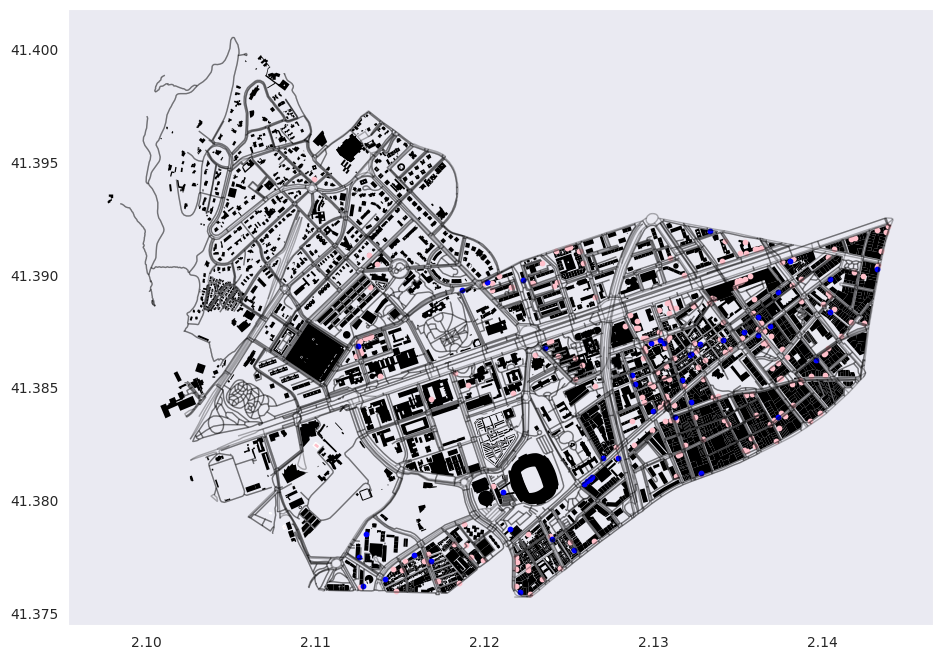

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black", edgecolor = 'none')



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, color="pink", markersize=10)
bar.plot(ax=ax, color="blue", markersize=10)

plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

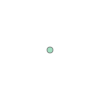

In [ ]:
coords = (2.11511,41.38617)
p = Point(coords)
p

In [ ]:
print(p.x, p.y)

2.11511 41.38617


In [ ]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

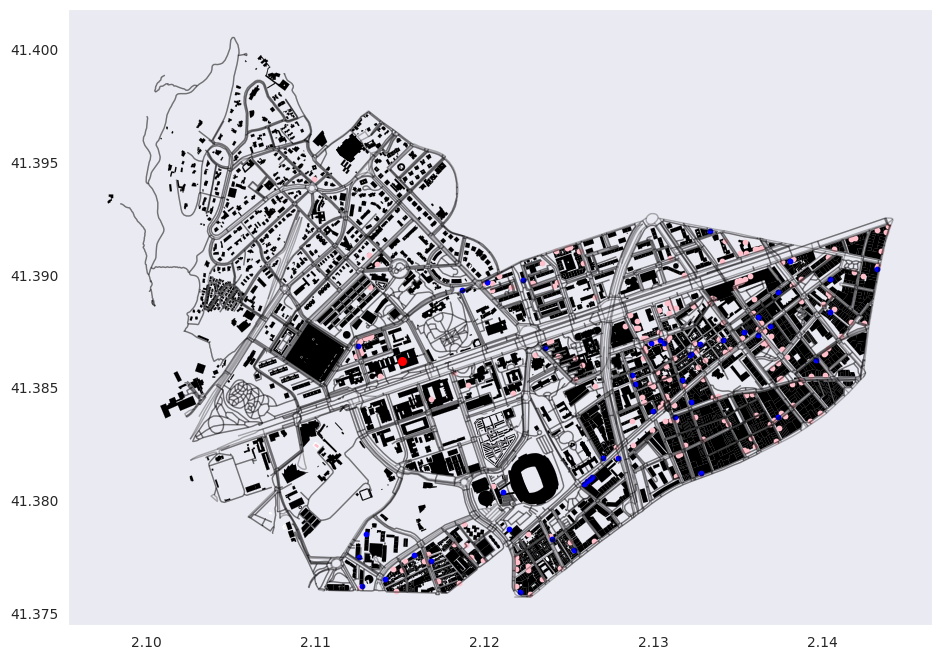

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black", edgecolor = 'black', linewidth = 0.1)



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, color="pink", markersize=10)
bar.plot(ax=ax, color="blue", markersize=10)

# Plot IAAC
geom.plot(ax=ax, color="red", markersize=30)


plt.show()

#### ㊙️ Geocoding: name to coordinates

In [ ]:
our_place = "Palau Reial de Pedralbes"  # "Institute for Advanced Architecture of Catalonia"
geocoded_addresses = geopandas.tools.geocode(
    [our_place],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)
geocoded_addresses.head()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


geometry                                            address
0  POINT (2.11730 41.38854)  Palau Reial de Pedralbes, Carrer de Jordi Giro...

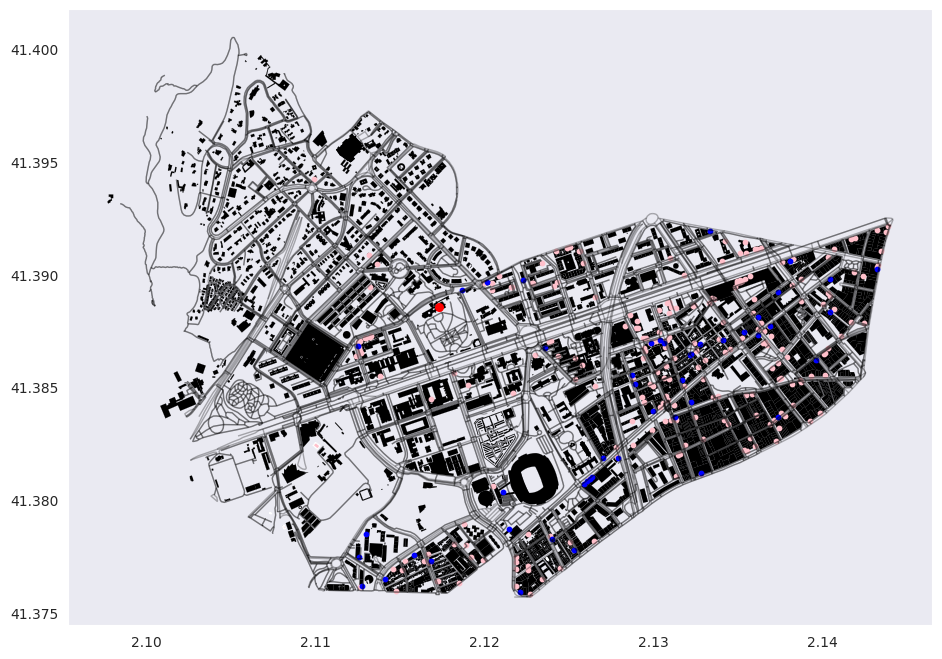

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black", edgecolor = 'black', linewidth = 0.1)



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, color="pink", markersize=10)
bar.plot(ax=ax, color="blue", markersize=10)

# Plot IAAC
geocoded_addresses.plot(ax=ax, color="red", markersize=30)


plt.show()

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many restaurants lie within 4 minutes fast walk (0.5 km). 1km is around 0.008 degrees

In [ ]:
print(p)

POINT (2.11511 41.38617)


In [ ]:
buildings.crs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
rad = p.buffer(0.008 * 0.5)  # making offset of 1.5 km from our point of interest

##how to convert degrees to meters?

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=buildings.crs
)

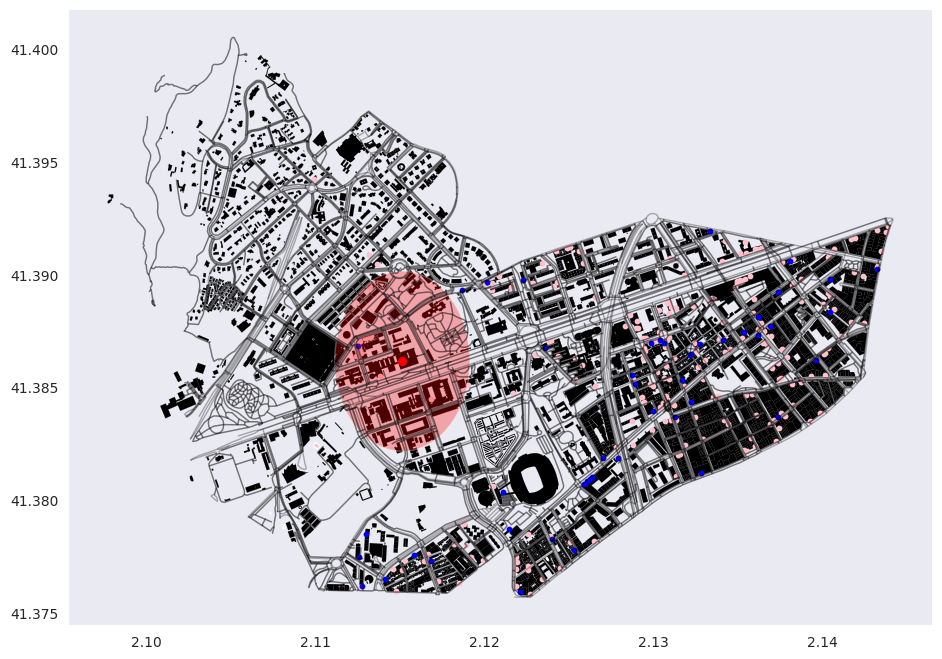

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black", edgecolor = 'black', linewidth = 0.1)



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, color="pink", markersize=10)
bar.plot(ax=ax, color="blue", markersize=10)

# Plot IAAC
geom.plot(ax=ax, facecolor="red", markersize=30)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

plt.show()

In [ ]:
accessible_restaurants = [r for r in restaurants["geometry"] if isinstance(r, Point) and r.within(rad["geometry"][0])]

accessible_restaurants = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_restaurants,
    },
    crs=buildings.crs
)

In [ ]:
accessible_restaurants.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(15, 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


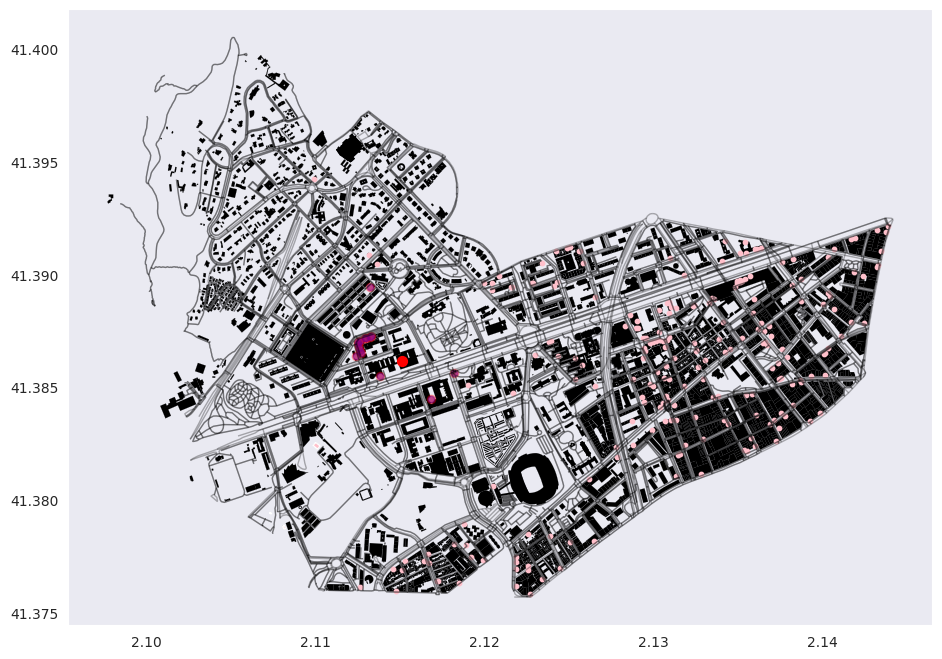

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black", edgecolor = 'black', linewidth = 0.1)



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, color="pink", markersize=10)
# bar.plot(ax=ax, color="blue", markersize=10)


# Plot IAAC
geom.plot(ax=ax, color="red", markersize=50)
rad.plot(ax=ax, linewidth=1, color="red", alpha=0.3)

accessible_restaurants.plot(ax=ax, color="purple", markersize=20, alpha=0.5)

plt.show()

### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

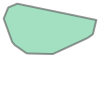

In [ ]:
zone = edges.unary_union.convex_hull
zone

In [ ]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

{'n': 5266,
 'm': 15054,
 'k_avg': 5.717432586403342,
 'edge_length_total': 521276.99999999854,
 'edge_length_avg': 34.62714228776395,
 'streets_per_node_avg': 3.2707937713634636,
 'streets_per_node_counts': {0: 0, 1: 307, 2: 14, 3: 2932, 4: 1972, 5: 41},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.058298518799848084,
  2: 0.002658564375237372,
  3: 0.5567793391568553,
  4: 0.37447778199772125,
  5: 0.007785795670338018},
 'intersection_count': 4959,
 'street_length_total': 299352.15099999943,
 'street_segment_count': 8484,
 'street_length_avg': 35.28431765676561,
 'circuity_avg': 1.0385866240335158,
 'self_loop_proportion': 0.0011786892975011788,
 'node_density_km': 6744615777847.411,
 'intersection_density_km': 6351414668124.821,
 'edge_density_km': 667643957240591.5,
 'street_density_km': 383405856583204.9}

In [ ]:
zone_1 = geopandas.GeoDataFrame(
    {
        "geometry": [zone],
    },
    crs=buildings.crs
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
zone_2 = accessible_restaurants.unary_union.convex_hull

zone_2 = geopandas.GeoDataFrame(
    {
        "geometry": [zone_2],
    },
    crs=buildings.crs
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


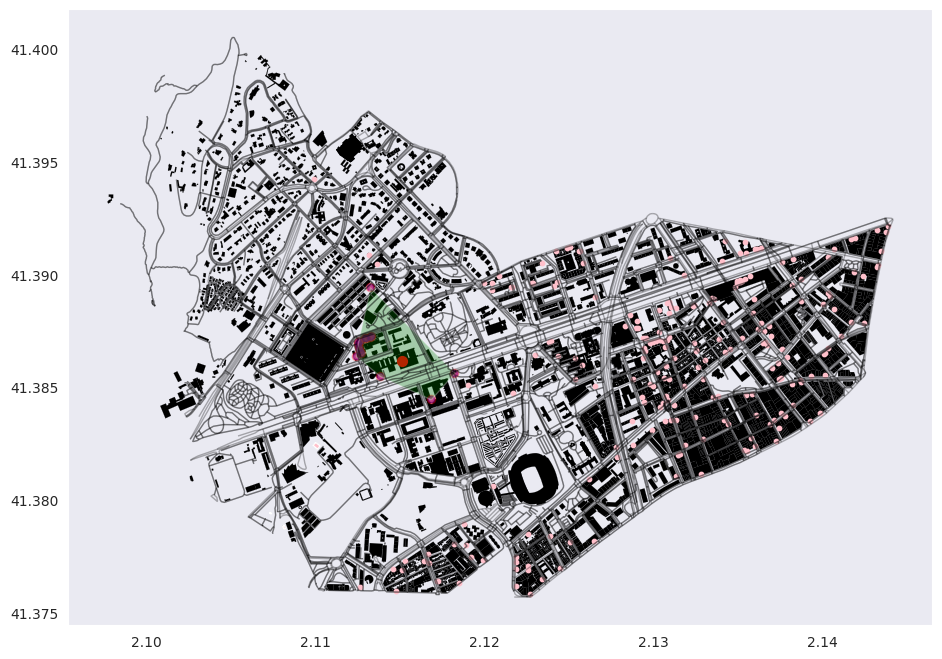

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black", edgecolor = 'black', linewidth = 0.1)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, color="pink", markersize=10)
# bar.plot(ax=ax, color="blue", markersize=10)


# Plot IAAC
geom.plot(ax=ax, color="red", markersize=50)
rad.plot(ax=ax, linewidth=1, color="red", alpha=0.3)

accessible_restaurants.plot(ax=ax, color="purple", markersize=20, alpha=0.5)
zone_2.plot(ax=ax, color = 'green', alpha = 0.3)

plt.show()

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

In [ ]:
origin = (
    osmnx.geocode_to_gdf("Palau Reial de Pedralbes")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Parc de les Corts")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

In [ ]:

origin = (
    osmnx.geocode_to_gdf("N3326863254", by_osmid = True)  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)
destination = (
    osmnx.geocode_to_gdf("Parc de les Corts")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

In [ ]:
osmnx.geocode_to_gdf("N3326863254", by_osmid = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geometry  bbox_north  bbox_south  bbox_east  bbox_west  \
0  POINT (2.12898 41.38658)   41.386629   41.386529   2.129026   2.128926   

    place_id osm_type      osm_id        lat       lon    class    type  \
0  103250839     node  3326863254  41.386579  2.128976  tourism  museum   

   place_rank  importance addresstype                    name  \
0          30     0.00001     tourism  Roca Barcelona Gallery   

                                        display_name  
0  Roca Barcelona Gallery, 211-213, Carrer de Joa...

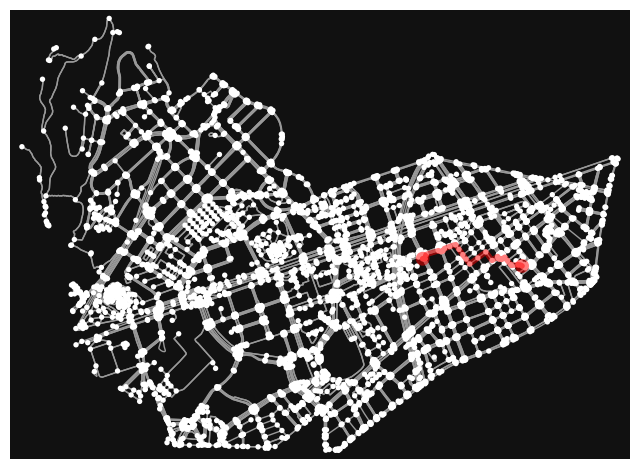

In [ ]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

In [ ]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

<ipython-input-85-3f1016416ab9>:14: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  route_geom.length


0    0.022427
dtype: float64

### 🕸 Walkability analysis

How far can you reach from a place on foot?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: 'Point' object has no attribute 'crs'

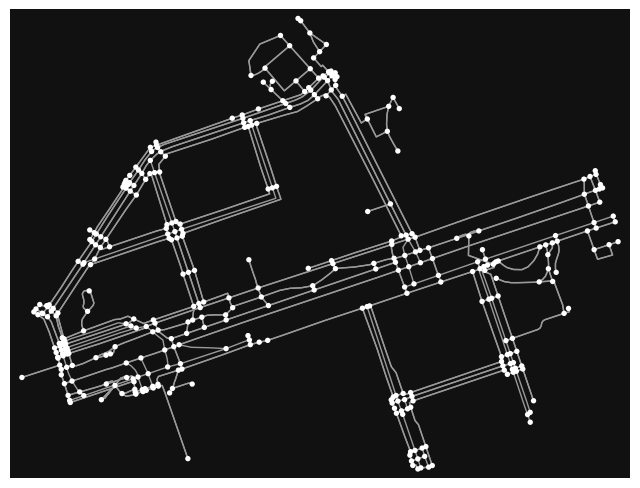

In [ ]:
# getting iaac node from the graph:
iaac_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only:
g = osmnx.truncate.truncate_graph_dist(graph, iaac_node, max_dist=500)
figure, ax = osmnx.plot_graph(g)


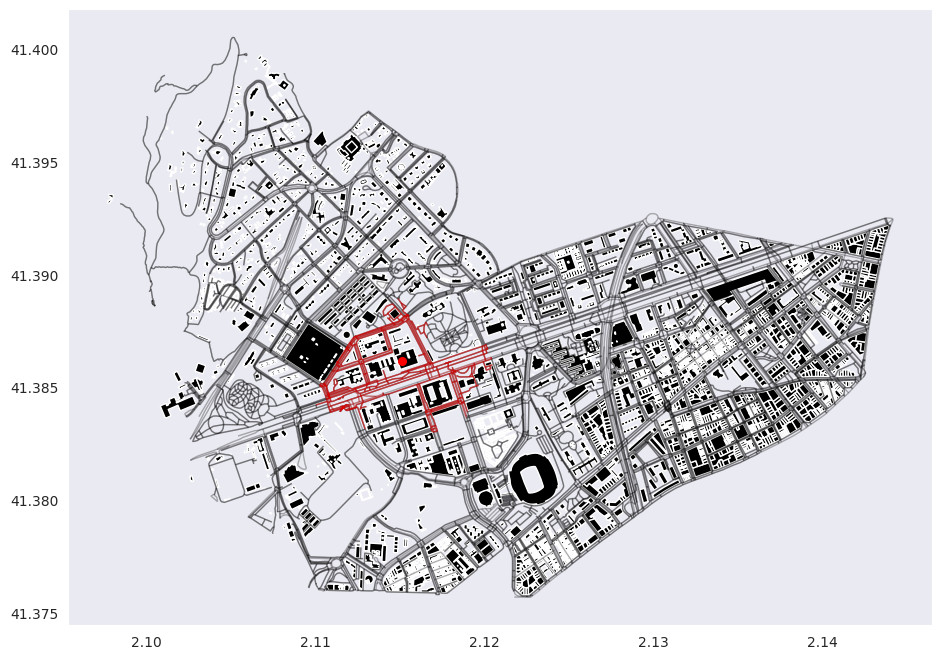

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, color="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

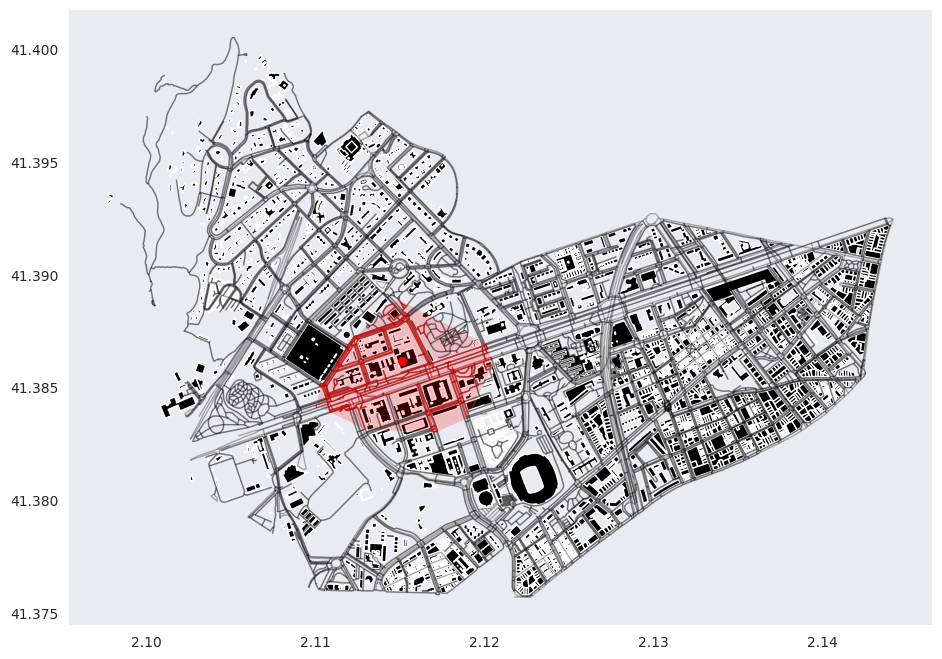

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=buildings.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.